In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir='C:\\Users\\ADMIN\\Downloads\\kmeansclustering\\Weekday - Codes and Datasets'

In [3]:
os.chdir(data_dir)

In [4]:
data=pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [55]:
data_1=data[['price','bedrooms','bathrooms','sqft_living']]

In [56]:
data_1.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [57]:
data_1.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [58]:
def scale(x):
    return((x-np.mean(x))/np.std(x))
dat_scaled=data_1.apply(scale,axis=0)

In [59]:
dat_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [60]:
import sklearn.preprocessing as preprocessing 
dat_scale=preprocessing.scale(data_1,axis=0)

In [61]:
dat_scale.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [62]:
print(dat_scale)

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]


In [63]:
type(dat_scale)

numpy.ndarray

In [64]:
print ("Shape of the object is "+str(dat_scaled.shape))

Shape of the object is (21613, 4)


In [65]:
import sklearn.cluster as cluster

In [66]:
kmeans=cluster.KMeans(n_clusters=3,init='k-means++')

In [67]:
kmeans=kmeans.fit(dat_scale)

In [68]:
set(lab)

{0, 1, 2}

In [69]:
kmeans.cluster_centers_

array([[-0.02502555,  0.36703284,  0.38113537,  0.2402088 ],
       [ 1.94021339,  1.08643761,  1.55899777,  1.95423096],
       [-0.46301372, -0.71934441, -0.85650332, -0.78682198]])

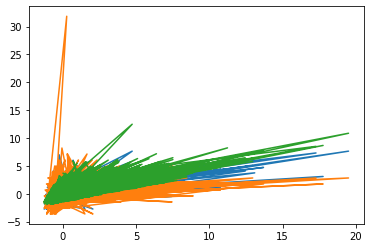

In [70]:
plt.plot(dat_scaled.price,dat_scaled.bathrooms)
plt.plot(dat_scaled.price,dat_scaled.bedrooms)
plt.plot(dat_scaled.price,dat_scaled.sqft_living)

In [71]:
from scipy.spatial.distance import cdist

In [72]:
#elboe method
from scipy.spatial.distance import cdist
K=range(1,20)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=3,init='k-means++')
    kmeans.fit(dat_scale)
    wss.append(sum(np.min(cdist(dat_scale,kmeans.cluster_centers_,'euclidean'),axis=1))/dat_scale.shape[0])

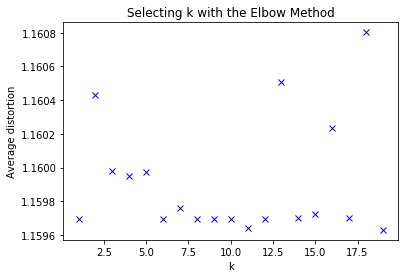

In [73]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()